In [1]:
%matplotlib inline

from datetime import datetime, timedelta
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
# какая то странная библиотека, обычно используют sklearn.metrics
# import ml_metrics as metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('stocks.csv',';', index_col=['<DATE>'], parse_dates=['<DATE>'])
dataset.head()

Unnamed: 0 <TICKER>  <OPEN>  <CLOSE>
<DATE>                                          
2007-12-12           0     AFKS  43.000   41.449
2007-12-13           1     AFKS  41.200   40.896
2007-12-14           2     AFKS  40.200   41.797
2007-12-17           3     AFKS  41.890   41.900
2007-12-18           4     AFKS  41.001   41.400

In [3]:
del dataset['Unnamed: 0']
dataset.head()

<TICKER>  <OPEN>  <CLOSE>
<DATE>                              
2007-12-12     AFKS  43.000   41.449
2007-12-13     AFKS  41.200   40.896
2007-12-14     AFKS  40.200   41.797
2007-12-17     AFKS  41.890   41.900
2007-12-18     AFKS  41.001   41.400

In [4]:
pd.unique(dataset['<TICKER>'])

array(['AFKS', 'AFLT', 'AKRN', 'ALRS', 'BSPB', 'CHMF', 'DIXY', 'FEES',
       'GAZP', 'GCHE', 'GMKN', 'HYDR', 'IRAO', 'KMAZ', 'LKOH', 'LSRG',
       'MAGN', 'MFON', 'MSTT', 'MTSS', 'MVID', 'NLMK', 'NMTP', 'NVTK',
       'PHOR', 'PIKK', 'POLY', 'ROSN', 'RTKM', 'RUALR', 'SBER', 'SNGS',
       'SVAV', 'TATN', 'TRMK', 'TRNFP', 'UPRO', 'URKA', 'VTBR', 'YNDX'],
      dtype=object)

In [5]:
dataset['<OPEN>'][(dataset['<TICKER>'] == 'SBER') & (dataset.index > datetime(2008, 1, 1))]

<DATE>
2008-01-09    101.99
2008-01-10    102.07
2008-01-11    103.60
2008-01-14    104.28
2008-01-15    105.20
               ...  
2020-09-23    228.94
2020-09-24    228.07
2020-09-25    228.26
2020-09-26    228.26
2020-09-30    222.80
Name: <OPEN>, Length: 3019, dtype: float64

In [6]:
rosn_open = dataset['<OPEN>'][(dataset['<TICKER>'] == 'ROSN') & (dataset.index > datetime(2008, 1, 1))]
rosn_close = dataset['<CLOSE>'][(dataset['<TICKER>'] == 'ROSN')  & (dataset.index > datetime(2008, 1, 1))]
sber_open = dataset['<OPEN>'][(dataset['<TICKER>'] == 'SBER') & (dataset.index > datetime(2008, 1, 1))]
sber_close = dataset['<CLOSE>'][(dataset['<TICKER>'] == 'SBER') & (dataset.index > datetime(2008, 1, 1))]
urka_open = dataset['<OPEN>'][(dataset['<TICKER>'] == 'URKA') & (dataset.index > datetime(2008, 1, 1))]
urka_close = dataset['<CLOSE>'][(dataset['<TICKER>'] == 'URKA') & (dataset.index > datetime(2008, 1, 1))]
vtbr_open = dataset['<OPEN>'][(dataset['<TICKER>'] == 'VTBR') & (dataset.index > datetime(2008, 1, 1))]
vtbr_close = dataset['<CLOSE>'][(dataset['<TICKER>'] == 'VTBR') & (dataset.index > datetime(2008, 1, 1))]
yndx_open = dataset['<OPEN>'][(dataset['<TICKER>'] == 'YNDX') & (dataset.index > datetime(2008, 1, 1))]
yndx_close = dataset['<CLOSE>'][(dataset['<TICKER>'] == 'YNDX') & (dataset.index > datetime(2008, 1, 1))]

#  Временные графики для 5 компаний

## ROSN

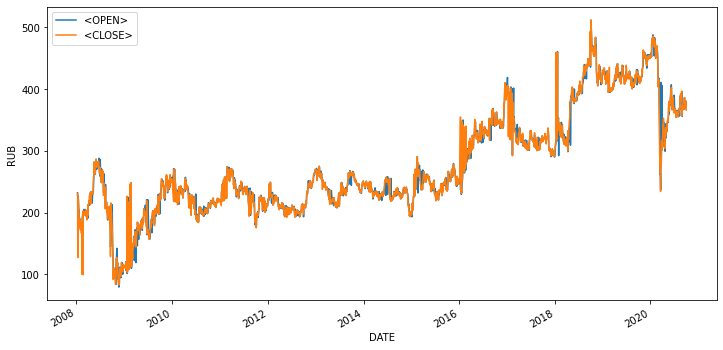

In [7]:
rosn_open.plot(figsize=(12,6), legend=True)
rosn_close.plot(figsize=(12,6), legend=True)
plt.xlabel('DATE')
plt.ylabel('RUB')
plt.show()

## SBER

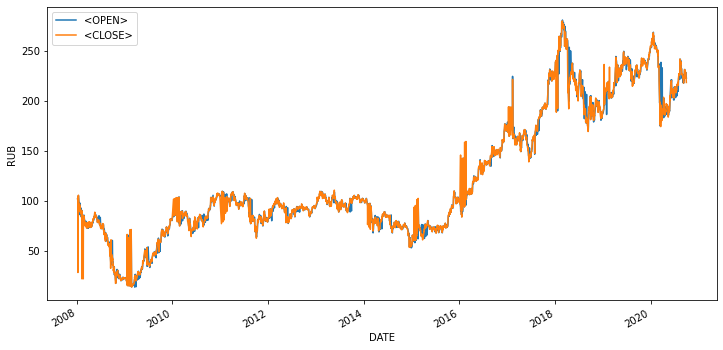

In [8]:
sber_open.plot(figsize=(12,6), legend=True)
sber_close.plot(figsize=(12,6), legend=True)
plt.xlabel('DATE')
plt.ylabel('RUB')
plt.show()

## URKA 

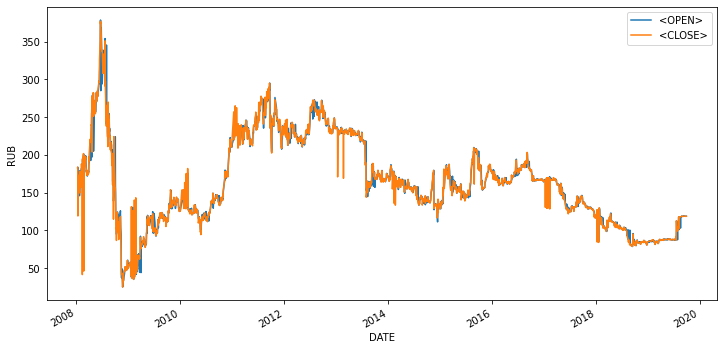

In [9]:
urka_open.plot(figsize=(12,6), legend=True)
urka_close.plot(figsize=(12,6), legend=True)
plt.xlabel('DATE')
plt.ylabel('RUB')
plt.show()

## VTBR 

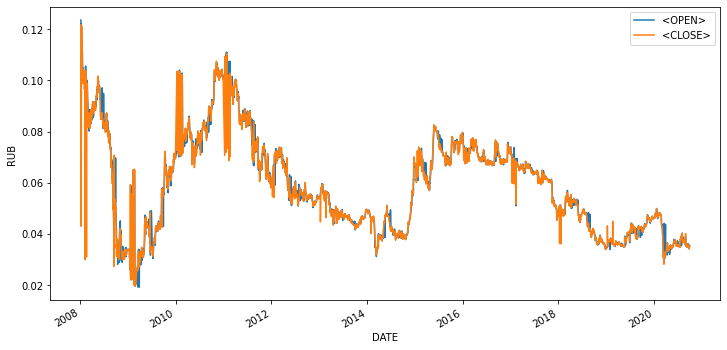

In [10]:
vtbr_open.plot(figsize=(12,6), legend=True)
vtbr_close.plot(figsize=(12,6), legend=True)
plt.xlabel('DATE')
plt.ylabel('RUB')
plt.show()

## YNDX 

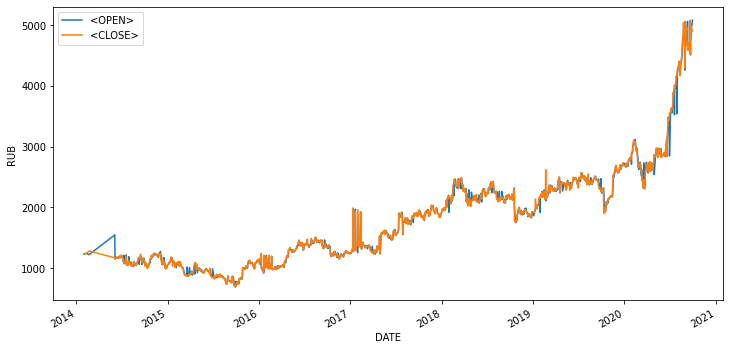

In [11]:
yndx_open.plot(figsize=(12,6), legend=True)
yndx_close.plot(figsize=(12,6), legend=True)
plt.xlabel('DATE')
plt.ylabel('RUB')
plt.show()

# Candle plot для этих же компаний

Для построения таких графиков необходимо больше информации - нужны цены откытия и закрытия, а так же HIGH и LOW

In [2]:
dataset_candle = pd.read_csv('stocks_forcandle.csv',';', index_col=['<DATE>'], parse_dates=['<DATE>'])
del dataset_candle['Unnamed: 0']
dataset_candle.sample(5)

<TICKER>    <OPEN>  <CLOSE>    <HIGH>    <LOW>
<DATE>                                                   
2019-10-16     MAGN    36.295   36.975    37.175   36.295
2008-08-12     DIXY   299.970  293.010   303.000  293.010
2015-06-20     SVAV   478.000  470.000   478.000  470.000
2014-03-31     MFON  1017.000  988.000  1030.000  973.000
2009-11-05     RTKM   188.210  191.240   192.250  187.500

In [3]:
# Исправил множественное задание рядов по компаниям на определение через словарь
company_names = ['ROSN', 'SBER', 'URKA', 'VTBR', 'YNDX']
company_keys = ['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']
d = dict()
for cn in company_names:
    d[cn] = dict()
    for ck in company_keys: 
        d[cn][ck] = dataset_candle[ck][(dataset_candle['<TICKER>'] == cn) & (dataset_candle.index > datetime(2008, 1, 1))]

In [14]:
rosn_candle = go.Figure(data=[go.Candlestick(x=d['ROSN']['<OPEN>'].index,
                open=d['ROSN']['<OPEN>'],
                high=d['ROSN']['<HIGH>'],
                low=d['ROSN']['<LOW>'],
                close=d['ROSN']['<CLOSE>'])])
rosn_candle.update_layout(title='ROSN', title_x = 0.5)
rosn_candle.show()

## Как в статье на хабре

<AxesSubplot:xlabel='<DATE>'>

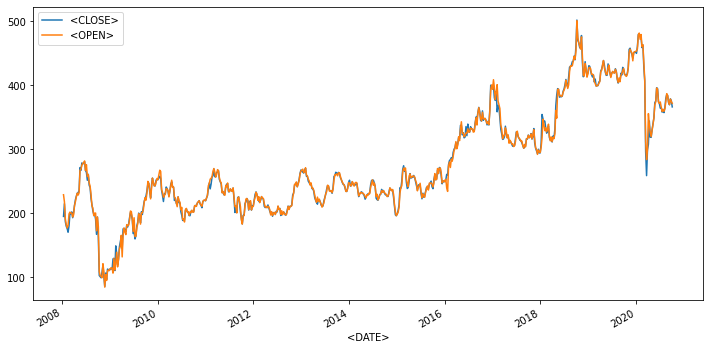

In [15]:
rosn_open2 = rosn_open
rosn_open = rosn_open.resample('W').mean().dropna()
rosn_close = rosn_close.resample('W').mean().dropna()
rosn_close.plot(figsize=(12,6), legend=True)
rosn_open.plot(figsize=(12,6), legend=True)

<AxesSubplot:xlabel='<DATE>'>

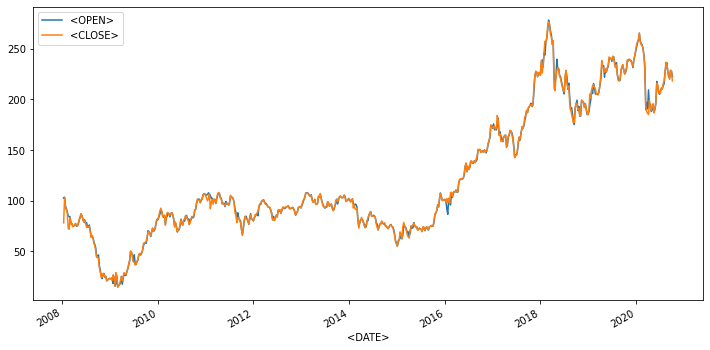

In [16]:
sber_open1 = sber_open.resample('W').mean().dropna()
sber_close1 = sber_close.resample('W').mean().dropna()
sber_open1.plot(figsize=(12,6),legend=True)
sber_close1.plot(figsize=(12,6), legend=True)

Ряд можно назвать стационарным только на определенных участках, например с 2010 по 2013 год

count    661.000000
mean     276.538787
std       83.781269
min       84.698000
25%      220.476000
50%      247.520000
75%      328.983333
max      500.610000
Name: <OPEN>, dtype: float64

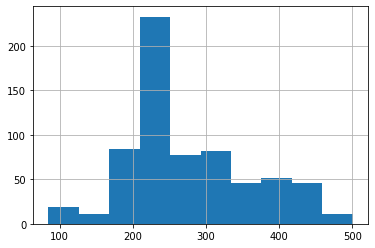

In [17]:
itog_rosn = rosn_open.describe()
rosn_open.hist()
itog_rosn

## Коэфициент вариации

In [18]:
print(f"V = {itog_rosn['std']/itog_rosn['mean'] : .5f}")

V =  0.30296


## Тест Харке-Бера

Используется для определения нормальности распределения

In [19]:
row =  ['JB', 'p-value', 'skew', 'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(rosn_open)
a = np.vstack([jb_test])
itog_rosn = SimpleTable(a, row)
print(itog_rosn)

        JB               p-value               skew             kurtosis     
-----------------------------------------------------------------------------
37.82027920347457 6.129580019037572e-09 0.5582454378510825 2.6441202519119513
-----------------------------------------------------------------------------


* Чем ближе распределение ошибок к нормальному, тем меньше статистика Харке—Бера отличается от нуля. При достаточно большом значении статистики p-value будет мало, и тогда будет основание отвергнуть нулевую гипотезу (статистика попала в «хвост» распределения).
* skew - коэффициент ассиметрии. Неформально говоря, коэффициент асимметрии положителен, если правый хвост распределения длиннее левого, и отрицателен в противном случае. Если распределение симметрично относительно математического ожидания, то его коэффициент асимметрии равен нулю.
* kurtosis - Коэффицие́нт эксце́сса (коэффициент островершинности) в теории вероятностей — мера остроты пика распределения случайной величины.Он отрицателен, если пик распределения около математического ожидания острый, и положителен, если пик очень гладкий.

## Обобщенный тест Дики-Фуллера

In [20]:
test = sm.tsa.adfuller(rosn_open)
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -1.7679208477973576
p-value:  0.39650033931397843
Critical values:  {'1%': -3.4403119951958754, '5%': -2.8659357770630662, '10%': -2.5691109142928195}
есть единичные корни, ряд не стационарен


Подтвердилось предположение о нестационарности ряда

In [21]:
rosn_open_diff1 = rosn_open.diff(periods=1).dropna()

In [22]:
test = sm.tsa.adfuller(rosn_open_diff1)
print('adf: ', test[0]) 
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -23.884184172941822
p-value:  0.0
Critical values:  {'1%': -3.4403119951958754, '5%': -2.8659357770630662, '10%': -2.5691109142928195}
единичных корней нет, ряд стационарен


Ряд первых разностей приблизился к стационарному

In [23]:
m = rosn_open_diff1.index[len(rosn_open_diff1.index) // 2 + 1]
r1 = sm.stats.DescrStatsW(rosn_open_diff1[m:])
r2 = sm.stats.DescrStatsW(rosn_open_diff1[:m])
print('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  0.6965152774750727


Здесь код с хабра не работал, пришлось вместо / 2 сделать // 2

Высокое (как определить насколько?) p-value дает нам возможность утверждать, что нулевая гипотеза о равенстве средних верна, что свидетельствует о стационарности ряда. Осталось убедиться в отсутствии тренда для этого построим график нашего нового ряда:

<AxesSubplot:xlabel='<DATE>'>

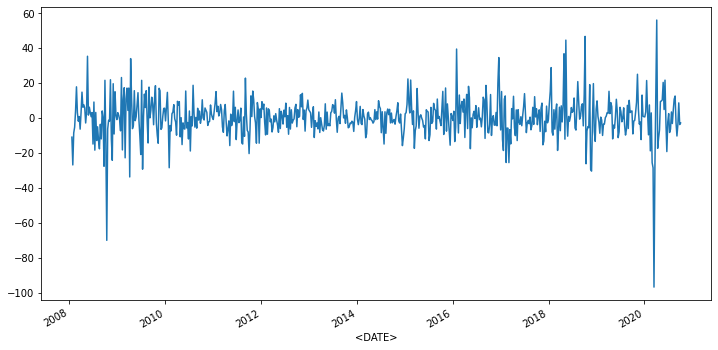

In [24]:
rosn_open_diff1.plot(figsize=(12,6))

Тренд отсутствует. Ряд первых разностей является стационарным, а исходный ряд — интегрированным рядом первого порядка.

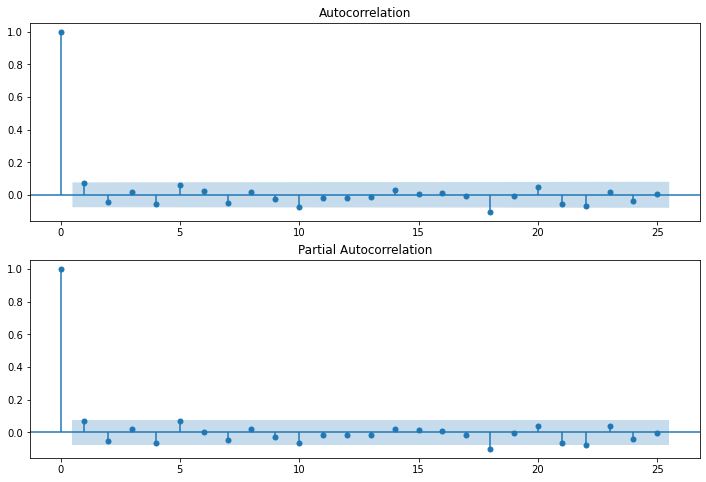

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(rosn_open_diff1.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(rosn_open_diff1, lags=25, ax=ax2)

Тут тоже при копировании кода с хабра ошибка - было ig первой строкой

* ACF
Сильно отличен от нуля только один лаг - первый, соответственно q = 1
* PACF 
Так же сильно отличен от нуля только 1 лаг, p = 1

In [26]:
# лучше чтобы не листать потом портянки данных выводить несколько первых или рандомных записей
rosn_open[rosn_open.index > datetime(2017, 1, 8)].sample(5)

<DATE>
2019-11-24    452.780000
2019-03-17    400.010000
2017-06-04    308.616667
2017-09-03    307.600000
2020-05-31    373.990000
Name: <OPEN>, dtype: float64

In [27]:
rosn_reindex = rosn_open2.reindex(pd.date_range(start=rosn_open2.index[0], end=rosn_open2.index[-1], freq='D'))
rosn_reindex.fillna(method='ffill', inplace=True)
rosn_reindex.head()

2008-01-09    231.99
2008-01-10    228.77
2008-01-11    225.99
2008-01-12    225.99
2008-01-13    225.99
Freq: D, Name: <OPEN>, dtype: float64

In [28]:
src_data_model = rosn_reindex[:'2020-09-06']
model = sm.tsa.ARIMA(src_data_model, order=(1,1,1), freq='D').fit(full_output=False, disp=0)

E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.

In [29]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.<OPEN>   No. Observations:                 4624
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16874.628
Method:                       css-mle   S.D. of innovations              9.304
Date:                Tue, 03 Nov 2020   AIC                          33757.256
Time:                        13:56:36   BIC                          33783.012
Sample:                    01-10-2008   HQIC                         33766.319
                         - 09-06-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0326      0.060      0.546      0.585      -0.085       0.150
ar.L1.D.<OPEN>     0.5974      0.024     24.661      0.000       0.550       0.645
ma.L1.D.<OPEN>    -0.8243      0.017

In [30]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True) #свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам
print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

        Q-stat       p-value
0     0.003463  9.530721e-01
1     4.875771  8.734533e-02
2    17.561430  5.416290e-04
3    22.669514  1.474037e-04
4    28.175563  3.363231e-05
5    30.518342  3.132079e-05
6    32.733575  2.967964e-05
7    33.350359  5.324858e-05
8    46.619111  4.620634e-07
9   111.327479  2.879951e-19
10  116.230185  1.036878e-19
11  116.254239  3.441511e-19
12  116.461810  1.004681e-18
13  116.506988  3.031935e-18
14  116.645248  8.451321e-18
15  117.248990  1.853359e-17
16  123.032812  4.068148e-18
17  125.144267  4.457443e-18
18  127.615091  4.115892e-18
19  142.631958  1.601030e-20
20  183.112797  7.349321e-28
21  183.527115  1.836585e-27
22  185.168474  2.605606e-27
23  185.169466  7.515731e-27
24  185.852361  1.572817e-26
25  185.855877  4.351131e-26
26  188.764396  3.343782e-26
27  192.224663  2.009610e-26
28  192.725008  4.308317e-26
29  193.045997  9.822121e-26
30  195.030084  1.085138e-25
31  195.830695  1.965449e-25
32  196.052927  4.488408e-25
33  203.478282

E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\stattools.py:660: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.

E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



In [31]:
pred = model.predict('2020-09-07','2020-09-30', typ='levels')
trn = rosn_reindex['2020-09-07':]
r2 = r2_score(trn, pred)
print('R^2: %1.2f' % r2)

R^2: 0.07


In [32]:
# стандартные метрики
mse(trn, pred, squared=True)

27.012058014495974

In [33]:
mae(trn,pred)

4.455086246252812

<AxesSubplot:>

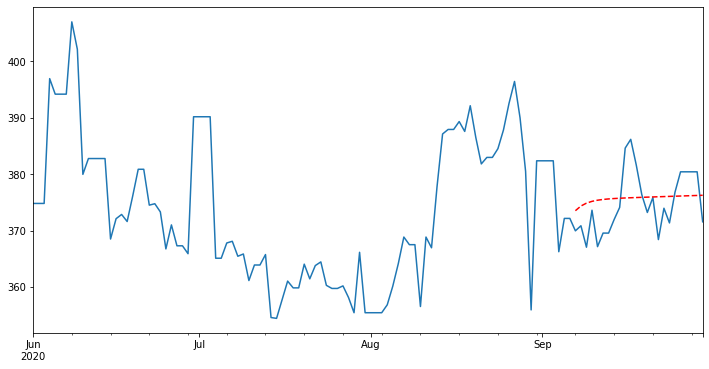

In [34]:
rosn_reindex['2020-06-01':].plot(figsize=(12,6))
pred.plot(style='r--')

In [35]:
rosn_reindex2 = rosn_open2.reindex(pd.date_range(start=rosn_open2.index[0], end=rosn_open2.index[-1], freq='D'))
rosn_reindex2 = pd.DataFrame({'OPEN':rosn_reindex2, 'DATE':rosn_reindex2.index})
rosn_reindex2 = rosn_reindex2.dropna()
rosn_reindex2.index = pd.RangeIndex(len(rosn_reindex2))
rosn_reindex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   OPEN    3019 non-null   float64       
 1   DATE    3019 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.3 KB


In [36]:
rosn_reindex2.iloc[:, 0]

0       231.99
1       228.77
2       225.99
3       222.95
4       224.85
         ...  
3014    374.00
3015    371.40
3016    376.85
3017    380.45
3018    371.60
Name: OPEN, Length: 3019, dtype: float64

In [37]:
src_data_model = rosn_reindex2.iloc[1:2900, 0]
model = sm.tsa.ARIMA(src_data_model, order=(1,1,1)).fit(full_output=False, disp=0)

E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.

In [38]:
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.OPEN   No. Observations:                 2898
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10996.224
Method:                       css-mle   S.D. of innovations             10.756
Date:                Tue, 03 Nov 2020   AIC                          22000.449
Time:                        13:56:37   BIC                          22024.336
Sample:                             1   HQIC                         22009.056
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0305      0.107      0.286      0.775      -0.179       0.240
ar.L1.D.OPEN    -0.0868      0.036     -2.388      0.017      -0.158      -0.016
ma.L1.D.OPEN    -0.4200      0.033    -12.84

In [39]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True) #свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам
print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

       Q-stat   p-value
0    0.003391  0.953567
1    0.247322  0.883679
2    1.429038  0.698742
3    2.137407  0.710503
4    2.385125  0.793687
5    8.602282  0.197212
6   12.359120  0.089350
7   12.894645  0.115526
8   12.936418  0.165504
9   14.761539  0.141001
10  16.988862  0.108205
11  26.912307  0.007955
12  26.919733  0.012760
13  49.666864  0.000007
14  49.722739  0.000013
15  55.481308  0.000003
16  56.323755  0.000004
17  56.398556  0.000008
18  56.788198  0.000012
19  57.088575  0.000020
20  59.242436  0.000017
21  59.267609  0.000029
22  59.908265  0.000039
23  60.888190  0.000048
24  60.941620  0.000077
25  62.037919  0.000089
26  67.533107  0.000025
27  67.583205  0.000040
28  68.559745  0.000048
29  71.847342  0.000027
30  72.720082  0.000033
31  72.765917  0.000052
32  73.347595  0.000068
33  75.681031  0.000052
34  76.115421  0.000071
35  76.447641  0.000098
36  77.123526  0.000121
37  77.200955  0.000176
38  77.269080  0.000253
39  78.475100  0.000266


E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\stattools.py:660: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.

E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



In [40]:
pred = model.predict(2899, 3018, typ='levels')
trn = rosn_reindex2.iloc[2899:, 0]
r2 = r2_score(trn, pred)
print('R^2: %1.2f' % r2)

R^2: -6.72


In [41]:
mse(trn, pred,squared=False)

52.959759505522484

In [42]:
mae(trn,pred)

50.19125868141893

<AxesSubplot:>

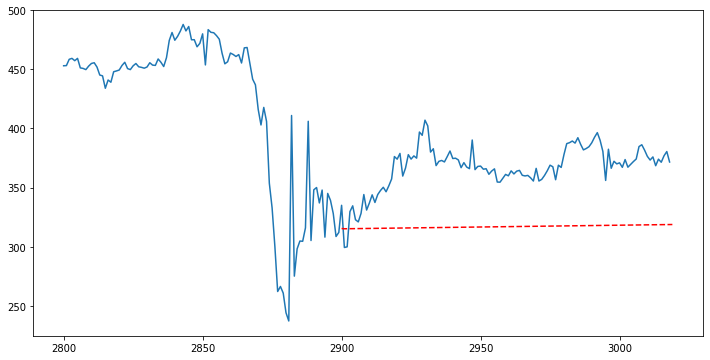

In [43]:
rosn_reindex2.iloc[2800:, 0].plot(figsize=(12,6))
pred.plot(style='r--')

In [44]:
def func_ARIMA(some_df):
    data_reindex2 = some_df.reindex(pd.date_range(start=some_df.index[0], end=some_df.index[-1], freq='D'))
    data_reindex2 = pd.DataFrame({'OPEN':data_reindex2, 'DATE':data_reindex2.index})
    data_reindex2 = data_reindex2.dropna()
    data_reindex2.index = pd.RangeIndex(len(data_reindex2))
    print(data_reindex2.tail(30))
    
    print('Тест Дики-Фуллера')
    i_d = 0
    df_for_fuller = data_reindex2.iloc[:, 0].copy(deep=True)
    while True:
        test_fuller = sm.tsa.adfuller(df_for_fuller)
        print('adf: ', test_fuller[0]) 
        print('p-value: ', test_fuller[1])
        print('Critical values: ', test_fuller[4])
        if test_fuller[0]> test_fuller[4]['5%']: 
            print('есть единичные корни, ряд не стационарен \n')
            some_df_dif = df_for_fuller.diff(periods=i_d + 1).dropna()
            i_d += 1
            df_for_fuller = some_df_dif.copy(deep=True)
        else:
            print('единичных корней нет, ряд стационарен \n')
            print(f'd = {i_d} \n')
            break
    m = some_df_dif.index[len(some_df_dif.index) // 2 + 1]
    r1 = sm.stats.DescrStatsW(some_df_dif[m:])
    r2 = sm.stats.DescrStatsW(some_df_dif[:m])
    print('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])
    
    print('\nУбеждаемся в отсутствии трендов \n')
    some_df_dif.plot(figsize=(12,6))
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(some_df_dif.values.squeeze(), lags=25, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(some_df_dif, lags=25, ax=ax2)
    plt.show()
    
    q_arima = int(input('Количество лагов сильно отличных от 0 на первом графике: '))
    p_arima = int(input('Количество лагов сильно отличных от 0 на втором графике: '))
    d_arima = i_d
    
    #in1 = data_reindex2[data_reindex2['DATE'] == '2020-08-31'].index[0]
    delta_days = 14
    delta = timedelta(days=delta_days)
    while True:
        try:
            in1 = data_reindex2[data_reindex2['DATE'] == (data_reindex2['DATE'].iloc[-1] - delta)].index[0]
            print(f'in1 = {in1}')
            break
        except IndexError:
            delta_days += 1
            delta = timedelta(days=delta_days)
    in2 = data_reindex2.shape[0] - 1 
    print(f'in2 = {in2}')
    src_data_model = data_reindex2.iloc[:in1, 0]
    model = sm.tsa.ARIMA(src_data_model, order=(p_arima,d_arima,q_arima)).fit(full_output=False, disp=0)
    print(model.summary())
    q_test = sm.tsa.stattools.acf(model.resid, qstat=True)
    print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))
    pred = model.predict(in1, in2, typ='levels')
    trn = data_reindex2.iloc[in1:, 0]
    r2 = r2_score(trn, pred)
    print('R^2: %1.2f' % r2)
    print(f'MSE = {mse(trn, pred,squared=False)}')
    print(f'MAE = {mae(trn, pred)}')
    pred.name = 'PRED'
    pred = pd.merge(pred, data_reindex2['DATE'], left_index=True, right_index=True)
    pred.set_index('DATE',inplace=True)
    data_reindex2.set_index('DATE',inplace=True)
    data_reindex2.iloc[in1 - 50:, 0].plot(figsize=(12,6))
    pred.iloc[:,0].plot(style='r--', figsize=(12,6))
    plt.show()

        OPEN       DATE
2989  384.55 2020-08-24
2990  387.85 2020-08-25
2991  392.55 2020-08-26
2992  396.45 2020-08-27
2993  390.00 2020-08-28
2994  380.55 2020-08-29
2995  356.00 2020-08-30
2996  382.40 2020-08-31
2997  366.30 2020-09-04
2998  372.20 2020-09-05
2999  370.00 2020-09-07
3000  370.90 2020-09-08
3001  367.10 2020-09-09
3002  373.65 2020-09-10
3003  367.20 2020-09-11
3004  369.60 2020-09-12
3005  372.00 2020-09-14
3006  374.15 2020-09-15
3007  384.65 2020-09-16
3008  386.20 2020-09-17
3009  381.65 2020-09-18
3010  376.40 2020-09-19
3011  373.25 2020-09-20
3012  375.90 2020-09-21
3013  368.45 2020-09-22
3014  374.00 2020-09-23
3015  371.40 2020-09-24
3016  376.85 2020-09-25
3017  380.45 2020-09-26
3018  371.60 2020-09-30
Тест Дики-Фуллера
adf:  -1.8027255844718952
p-value:  0.3791093586681688
Critical values:  {'1%': -3.4325294533972204, '5%': -2.862502941845959, '10%': -2.567282599200112}
есть единичные корни, ряд не стационарен 

adf:  -15.285550935986594
p-value:  4.516

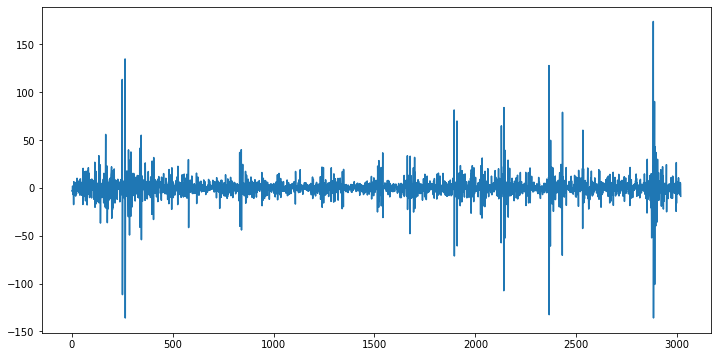

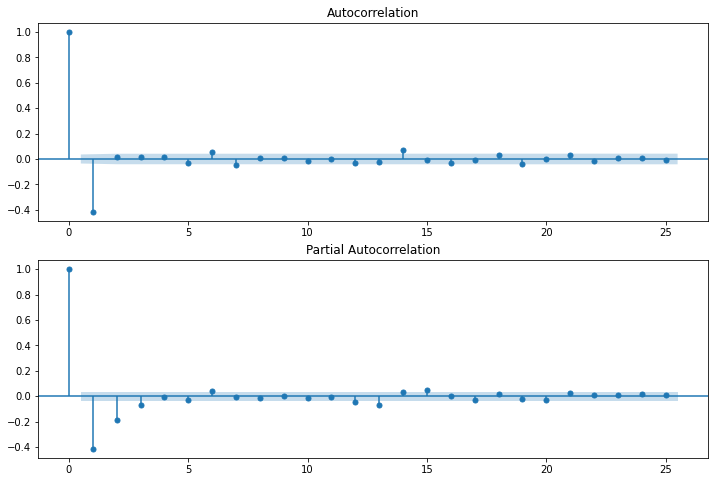

Количество лагов сильно отличных от 0 на первом графике: 2
Количество лагов сильно отличных от 0 на втором графике: 2
in1 = 3007
in2 = 3018


E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.

                             ARIMA Model Results                              
Dep. Variable:                 D.OPEN   No. Observations:                 3006
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11389.647
Method:                       css-mle   S.D. of innovations             10.697
Date:                Tue, 03 Nov 2020   AIC                          22791.295
Time:                        13:56:41   BIC                          22827.345
Sample:                             1   HQIC                         22804.261
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0475      0.108      0.439      0.661      -0.165       0.260
ar.L1.D.OPEN     0.2339      0.519      0.450      0.652      -0.784       1.251
ar.L2.D.OPEN    -0.0307      0.061     -0.50

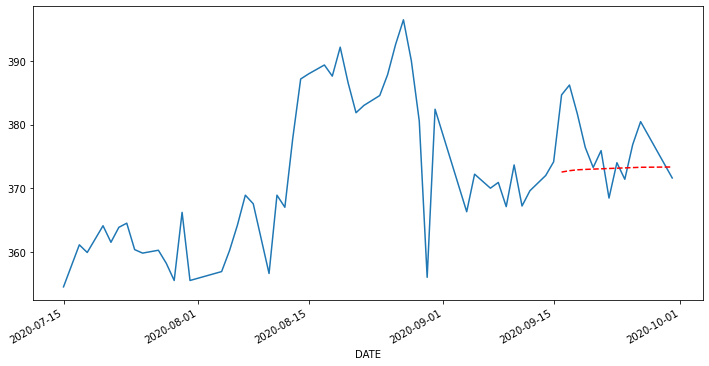

In [45]:
ex_df = d['ROSN']['<OPEN>']
func_ARIMA(ex_df)

        OPEN       DATE
2989  232.50 2020-08-24
2990  231.40 2020-08-25
2991  227.94 2020-08-26
2992  227.61 2020-08-27
2993  226.21 2020-08-28
2994  226.45 2020-08-29
2995  222.27 2020-08-30
2996  227.02 2020-08-31
2997  218.40 2020-09-04
2998  222.28 2020-09-05
2999  221.58 2020-09-07
3000  221.25 2020-09-08
3001  217.68 2020-09-09
3002  226.18 2020-09-10
3003  220.56 2020-09-11
3004  220.99 2020-09-12
3005  222.32 2020-09-14
3006  227.44 2020-09-15
3007  231.17 2020-09-16
3008  231.21 2020-09-17
3009  231.36 2020-09-18
3010  229.59 2020-09-19
3011  227.38 2020-09-20
3012  229.88 2020-09-21
3013  226.27 2020-09-22
3014  228.94 2020-09-23
3015  228.07 2020-09-24
3016  228.26 2020-09-25
3017  228.26 2020-09-26
3018  222.80 2020-09-30
Тест Дики-Фуллера
adf:  -0.6143553668589087
p-value:  0.8677051977377368
Critical values:  {'1%': -3.4325287272587293, '5%': -2.8625026211355227, '10%': -2.5672824284575735}
есть единичные корни, ряд не стационарен 

adf:  -15.400517003812418
p-value:  3.2

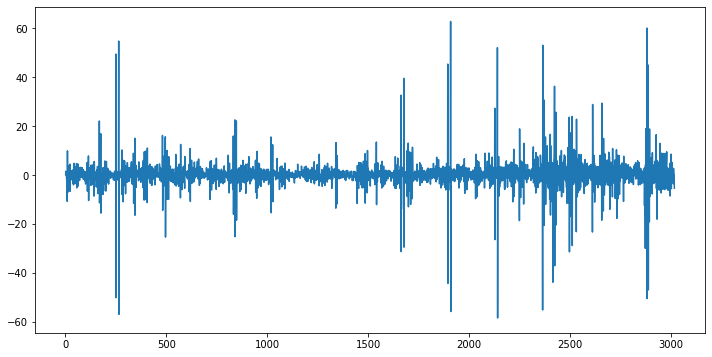

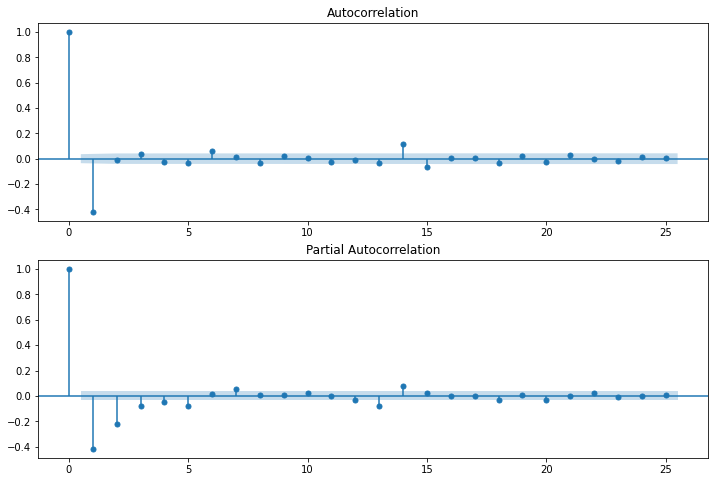

Количество лагов сильно отличных от 0 на первом графике: 2
Количество лагов сильно отличных от 0 на втором графике: 2
in1 = 3007
in2 = 3018


E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.

                             ARIMA Model Results                              
Dep. Variable:                 D.OPEN   No. Observations:                 3006
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9241.073
Method:                       css-mle   S.D. of innovations              5.234
Date:                Tue, 03 Nov 2020   AIC                          18494.146
Time:                        13:56:45   BIC                          18530.196
Sample:                             1   HQIC                         18507.112
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0406      0.046      0.877      0.380      -0.050       0.131
ar.L1.D.OPEN    -0.4217      0.297     -1.418      0.156      -1.005       0.161
ar.L2.D.OPEN    -0.0578      0.034     -1.69

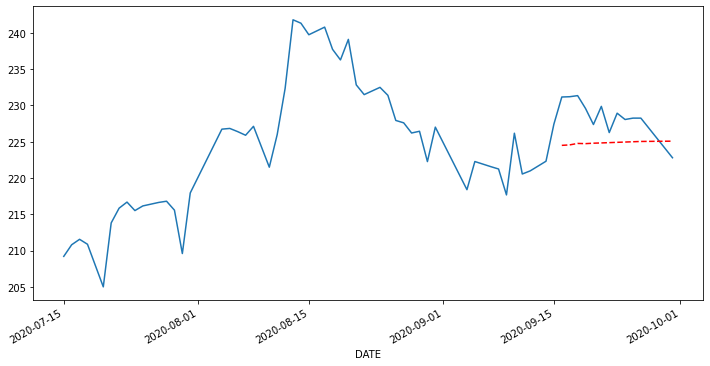

In [46]:
ex_df = d['SBER']['<OPEN>']
func_ARIMA(ex_df)

        OPEN       DATE
1487  4792.2 2020-08-24
1488  4869.0 2020-08-25
1489  5040.0 2020-08-26
1490  4952.4 2020-08-27
1491  4839.2 2020-08-28
1492  4841.2 2020-08-29
1493  4261.0 2020-08-30
1494  4888.0 2020-08-31
1495  4909.0 2020-09-04
1496  4863.6 2020-09-05
1497  4845.0 2020-09-07
1498  4964.0 2020-09-08
1499  4668.2 2020-09-09
1500  5064.2 2020-09-10
1501  4594.0 2020-09-11
1502  4646.8 2020-09-12
1503  4680.0 2020-09-14
1504  4710.6 2020-09-15
1505  4672.0 2020-09-16
1506  4621.8 2020-09-17
1507  4580.0 2020-09-18
1508  4611.8 2020-09-19
1509  5012.4 2020-09-20
1510  4615.2 2020-09-21
1511  4513.2 2020-09-22
1512  4900.0 2020-09-23
1513  4995.0 2020-09-24
1514  4765.8 2020-09-25
1515  4953.6 2020-09-26
1516  5085.6 2020-09-30
Тест Дики-Фуллера
adf:  2.5829674607008526
p-value:  0.9990718100573726
Critical values:  {'1%': -3.4347111923936393, '5%': -2.863466189518188, '10%': -2.5677954794761004}
есть единичные корни, ряд не стационарен 

adf:  -9.941600262506325
p-value:  2.6553

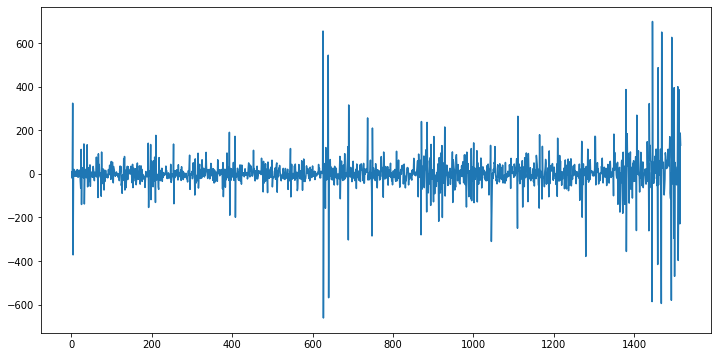

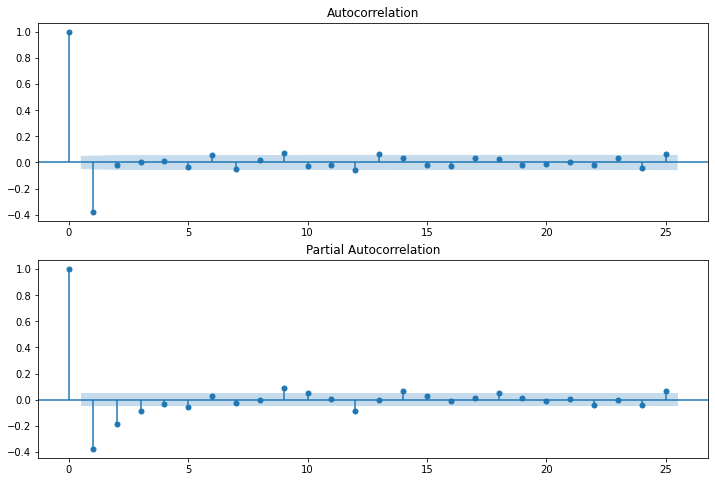

Количество лагов сильно отличных от 0 на первом графике: 1
Количество лагов сильно отличных от 0 на втором графике: 2
in1 = 1505
in2 = 1516
                             ARIMA Model Results                              
Dep. Variable:                 D.OPEN   No. Observations:                 1504
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -8598.443
Method:                       css-mle   S.D. of innovations             73.555
Date:                Tue, 03 Nov 2020   AIC                          17206.886
Time:                        13:57:46   BIC                          17233.465
Sample:                             1   HQIC                         17216.786
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.3010      0.998      2.305      0.021       0.3

E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.


       Q-stat   p-value
0    0.000008  0.997774
1    0.001397  0.999302
2    0.023477  0.999050
3    0.398823  0.982573
4    0.460605  0.993495
5    5.004764  0.543202
6    5.263748  0.627811
7    9.758700  0.282372
8   16.021145  0.066441
9   16.132399  0.095905
10  17.818421  0.085891
11  22.642803  0.030916
12  29.525224  0.005510
13  35.978696  0.001051
14  36.592173  0.001451
15  38.369088  0.001340
16  40.290175  0.001178
17  40.371431  0.001857
18  40.500719  0.002811
19  40.877534  0.003862
20  41.619773  0.004696
21  41.741354  0.006717
22  42.916308  0.007086
23  43.246199  0.009323
24  48.133834  0.003594
25  50.371286  0.002838
26  50.484071  0.003999
27  50.484197  0.005708
28  50.898610  0.007214
29  51.804826  0.007994
30  64.740911  0.000359
31  68.379703  0.000190
32  68.758121  0.000258
33  78.094504  0.000025
34  78.944141  0.000031
35  79.011050  0.000046
36  79.595197  0.000060
37  79.607644  0.000090
38  80.502774  0.000104
39  80.502775  0.000154
R^2: -0.03
MSE 

E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\stattools.py:660: FutureWarning:

The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.

E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



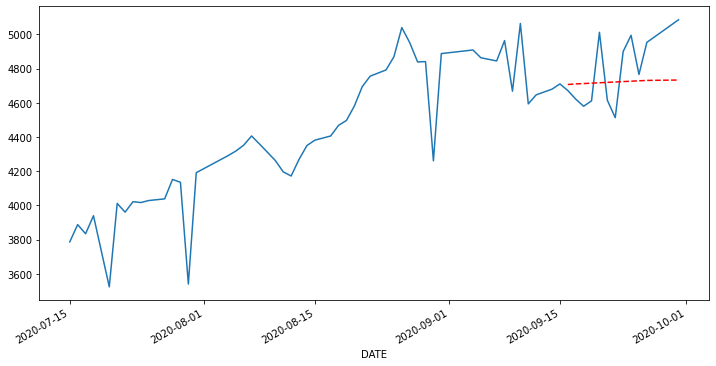

In [49]:
ex_df = d['YNDX']['<OPEN>']
func_ARIMA(ex_df)

## Построил ARIMA для SBER 2014-2019

        OPEN       DATE
1396  237.85 2019-11-15
1397  240.59 2019-11-18
1398  237.52 2019-11-19
1399  238.60 2019-11-20
1400  237.37 2019-11-21
1401  236.58 2019-11-22
1402  238.68 2019-11-25
1403  238.01 2019-11-26
1404  235.25 2019-11-27
1405  234.10 2019-11-28
1406  234.65 2019-11-29
1407  230.72 2019-12-04
1408  231.89 2019-12-05
1409  232.00 2019-12-06
1410  235.46 2019-12-09
1411  236.60 2019-12-10
1412  237.81 2019-12-11
1413  242.01 2019-12-12
1414  242.02 2019-12-13
1415  242.02 2019-12-16
1416  241.82 2019-12-17
1417  241.21 2019-12-18
1418  246.27 2019-12-19
1419  244.60 2019-12-20
1420  244.75 2019-12-23
1421  248.80 2019-12-24
1422  248.98 2019-12-25
1423  248.20 2019-12-26
1424  248.56 2019-12-27
1425  252.09 2019-12-30
Тест Дики-Фуллера
adf:  -0.39935419834085123
p-value:  0.9102065472902028
Critical values:  {'1%': -3.434992974078597, '5%': -2.863590546293418, '10%': -2.567861701478863}
есть единичные корни, ряд не стационарен 

adf:  -10.344677529891456
p-value:  2.629

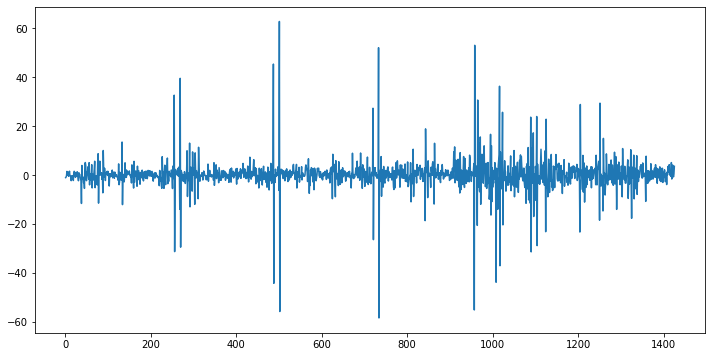

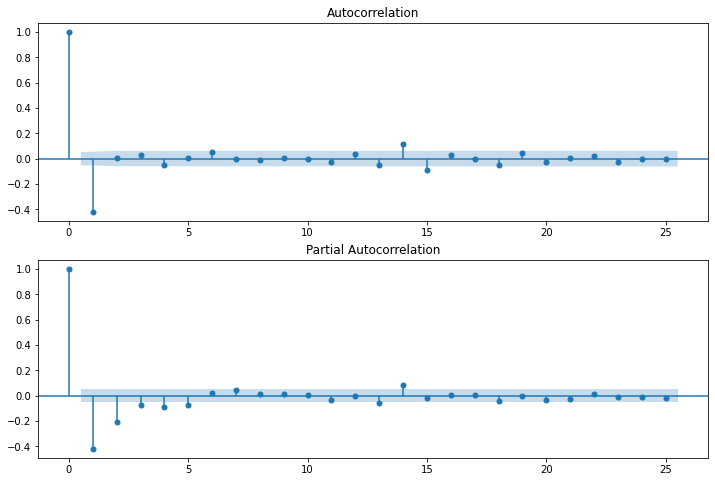

Количество лагов сильно отличных от 0 на первом графике: 2
Количество лагов сильно отличных от 0 на втором графике: 2
in1 = 1415
in2 = 1425


E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


E:\Program Files\Anaconda3\envs\stocks_prediction_project\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.

                             ARIMA Model Results                              
Dep. Variable:                 D.OPEN   No. Observations:                 1414
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4503.770
Method:                       css-mle   S.D. of innovations              5.848
Date:                Tue, 03 Nov 2020   AIC                           9019.541
Time:                        13:57:49   BIC                           9051.066
Sample:                             1   HQIC                          9031.319
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0999      0.074      1.349      0.177      -0.045       0.245
ar.L1.D.OPEN     0.1228      1.247      0.098      0.922      -2.322       2.568
ar.L2.D.OPEN     0.0079      0.051      0.15

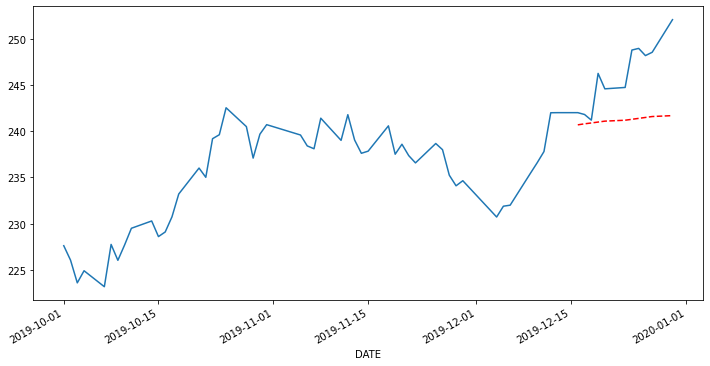

In [50]:
ex_df = d['SBER']['<OPEN>']
ex_df1 = ex_df[(ex_df.index > '2014-01-01') & (ex_df.index < '2020-01-01')]
func_ARIMA(ex_df1)

# Корреляция

**Корреляция** -  взаимозависимость  двух или нескольких случайных величин. Суть ее заключается в том, что при изменении значения одной переменной происходит закономерное изменение (уменьшению или увеличению) другой(-их) переменной(-ых).

Показатель корреляции. Коэффициент корреляции (r) характеризует величину отражающую степень взаимосвязи двух переменных между собой. Он может варьировать в пределах от -1 (отрицательная корреляция) до +1 (положительная корреляция). Если коэффициент корреляции равен 0 то, это говорит об отсутствии корреляционных связей между переменными. Причем если коэффициент корреляции ближе к 1 (или -1) то говориться о сильной корреляции, а если ближе к 0, то о слабой.

При положительной корреляции увеличение (или уменьшение) значений одной переменной ведет к закономерному увеличению (или уменьшению) другой переменной т.е. взаимосвязи типа увеличение-увеличение (уменьшение-уменьшение).

При отрицательной корреляции увеличение (или уменьшение) значений одной переменной ведет к закономерному уменьшению (или увеличению) другой переменной т.е. взаимосвязи типа увеличение-уменьшение (уменьшение-увеличение).

In [4]:
money_data = pd.read_csv('money_brent.csv',';', index_col=['DATE'], parse_dates=['DATE'])
del money_data['Unnamed: 0']
money_data.head()

EUR/RUB  USD/RUB  HIGH BRENT, $  LOW BRENT, $  OPEN BRENT, $  \
DATE                                                                       
2008-01-10  35.9762  24.4387          96.04         91.83          95.67   
2008-01-11  35.9214  24.4796          92.97         90.73          92.26   
2008-01-12  36.0389  24.3671          91.36         90.52          91.07   
2008-01-15  36.1212  24.2913          92.94         90.50          92.25   
2008-01-16  36.1130  24.2858          90.98         88.30          90.74   

            CLOSE BRENT, $  
DATE                        
2008-01-10           92.26  
2008-01-11           91.06  
2008-01-12           90.98  
2008-01-15           90.76  
2008-01-16           88.91

In [42]:
stocks_data = d['ROSN']['<OPEN>']
stocks_money = pd.merge(money_data, stocks_data, left_index=True, right_index=True)
stocks_money.columns = ['EUR/RUB', 'USD/RUB', 'HIGH BRENT, $', 'LOW BRENT, $', 'OPEN BRENT, $',
       'CLOSE BRENT, $', 'ROSN_OPEN']
stocks_money

EUR/RUB  USD/RUB  HIGH BRENT, $  LOW BRENT, $  OPEN BRENT, $  \
2008-01-10  35.9762  24.4387          96.04         91.83          95.67   
2008-01-11  35.9214  24.4796          92.97         90.73          92.26   
2008-01-15  36.1212  24.2913          92.94         90.50          92.25   
2008-01-16  36.1130  24.2858          90.98         88.30          90.74   
2008-01-17  36.0646  24.3367          90.69         88.39          88.93   
...             ...      ...            ...           ...            ...   
2020-09-22  90.0063  76.0381          42.20         41.21          41.78   
2020-09-23  89.4813  76.2711          42.62         41.21          41.73   
2020-09-24  89.2508  76.3545          42.02         41.27          41.45   
2020-09-25  89.9818  77.1780          42.33         41.52          41.80   
2020-09-26  89.6637  76.8195          42.38         41.79          41.80   

            CLOSE BRENT, $  ROSN_OPEN  
2008-01-10           92.26     228.77  
2008-01-11           91.06     225.99  
2008-01-15           90.76     224.85  
2008-01-16           88.91     220.30  
2008-01-17           88.48     214.19  
...                    ...        ...  
2020-09-22           41.73     368.45  
2020-09-23           41.45     374.00  
2020-09-24           41.80     371.40  
2020-09-25           41.80     376.85  
2020-09-26           42.26     380.45  

[2323 rows x 7 columns]

In [43]:
prev = list(stocks_money['ROSN_OPEN'].iloc[:-1])
stocks_money = stocks_money.drop(stocks_money.index[0])
stocks_money['ROSN_OPEN_prev'] = prev
stocks_money

EUR/RUB  USD/RUB  HIGH BRENT, $  LOW BRENT, $  OPEN BRENT, $  \
2008-01-11  35.9214  24.4796          92.97         90.73          92.26   
2008-01-15  36.1212  24.2913          92.94         90.50          92.25   
2008-01-16  36.1130  24.2858          90.98         88.30          90.74   
2008-01-17  36.0646  24.3367          90.69         88.39          88.93   
2008-01-18  35.8620  24.5043          89.97         88.22          88.50   
...             ...      ...            ...           ...            ...   
2020-09-22  90.0063  76.0381          42.20         41.21          41.78   
2020-09-23  89.4813  76.2711          42.62         41.21          41.73   
2020-09-24  89.2508  76.3545          42.02         41.27          41.45   
2020-09-25  89.9818  77.1780          42.33         41.52          41.80   
2020-09-26  89.6637  76.8195          42.38         41.79          41.80   

            CLOSE BRENT, $  ROSN_OPEN  ROSN_OPEN_prev  
2008-01-11           91.06     225.99          228.77  
2008-01-15           90.76     224.85          225.99  
2008-01-16           88.91     220.30          224.85  
2008-01-17           88.48     214.19          220.30  
2008-01-18           88.86     207.11          214.19  
...                    ...        ...             ...  
2020-09-22           41.73     368.45          376.40  
2020-09-23           41.45     374.00          368.45  
2020-09-24           41.80     371.40          374.00  
2020-09-25           41.80     376.85          371.40  
2020-09-26           42.26     380.45          376.85  

[2322 rows x 8 columns]

<AxesSubplot:>

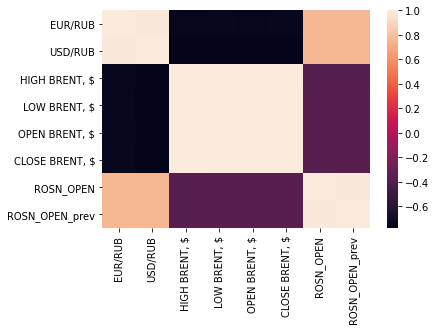

In [54]:
corr = stocks_money.corr()
sns.heatmap(corr)

# LightGBM

In [7]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

In [8]:
stocks_money.iloc[:-14, [0, 1, 5, 7]].values

array([[ 35.9214,  24.4796,  91.06  , 228.77  ],
       [ 36.1212,  24.2913,  90.76  , 225.99  ],
       [ 36.113 ,  24.2858,  88.91  , 224.85  ],
       ...,
       [ 89.1353,  75.468 ,  42.4   , 380.55  ],
       [ 89.0384,  75.1823,  42.35  , 366.3   ],
       [ 89.4771,  75.591 ,  39.87  , 372.2   ]])

In [9]:
stocks_money[['EUR/RUB', 'USD/RUB', 'CLOSE BRENT, $', 'ROSN_OPEN_prev']].iloc[:-14].values

array([[ 35.9214,  24.4796,  91.06  , 228.77  ],
       [ 36.1212,  24.2913,  90.76  , 225.99  ],
       [ 36.113 ,  24.2858,  88.91  , 224.85  ],
       ...,
       [ 89.1353,  75.468 ,  42.4   , 380.55  ],
       [ 89.0384,  75.1823,  42.35  , 366.3   ],
       [ 89.4771,  75.591 ,  39.87  , 372.2   ]])

## Data preprocessing


In [10]:
# Importing the dataset
X = stocks_money[['EUR/RUB', 'USD/RUB', 'CLOSE BRENT, $', 'ROSN_OPEN_prev']].iloc[:-14].values
y = stocks_money['ROSN_OPEN'].iloc[:-14].values
# Splitting the dataset into the Training set and Test set
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, shuffle=False)
x_train, x_test = X, stocks_money[['EUR/RUB', 'USD/RUB', 'CLOSE BRENT, $', 'ROSN_OPEN_prev']].iloc[-14:].values
y_train, y_test = y, stocks_money['ROSN_OPEN'].iloc[-14:].values
# Feature Scaling
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [11]:
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = ['r2_score']
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
regr = lgb.train(params, d_train, 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2308, number of used features: 4
[LightGBM] [Info] Start training from score 276.040277


In [12]:
y_pred=regr.predict(x_test)

In [62]:
len(x_test)

14

In [63]:
len(x_train)

2308

In [64]:
len(X)

2308

In [65]:
len(y_train)

2308

In [66]:
len(y_pred)

14

In [67]:
x_train

array([[ 35.9214,  24.4796,  91.06  , 228.77  ],
       [ 36.1212,  24.2913,  90.76  , 225.99  ],
       [ 36.113 ,  24.2858,  88.91  , 224.85  ],
       ...,
       [ 89.1353,  75.468 ,  42.4   , 380.55  ],
       [ 89.0384,  75.1823,  42.35  , 366.3   ],
       [ 89.4771,  75.591 ,  39.87  , 372.2   ]])

In [68]:
y_pred[:14]

array([368.13378057, 357.2630914 , 365.64407535, 357.2630914 ,
       368.13378057, 376.51476453, 376.51476453, 376.51476453,
       376.51476453, 376.51476453, 368.13378057, 376.51476453,
       368.13378057, 376.51476453])

In [69]:
stocks_money['ROSN_OPEN'].iloc[-14:]

2020-09-09    367.10
2020-09-10    373.65
2020-09-11    367.20
2020-09-12    369.60
2020-09-15    374.15
2020-09-16    384.65
2020-09-17    386.20
2020-09-18    381.65
2020-09-19    376.40
2020-09-22    368.45
2020-09-23    374.00
2020-09-24    371.40
2020-09-25    376.85
2020-09-26    380.45
Name: ROSN_OPEN, dtype: float64

In [13]:
mse(y_pred, y_test, squared=False)

9.66998244503423

In [14]:
mae(y_pred, y_test)

8.284967747671592

In [15]:
r2_score(y_pred, y_test)

-1.0275272287432

In [44]:
stocks_money['Predict'] = np.nan
stocks_money['Predict'].iloc[-14:] = y_pred[:14]
stocks_money

EUR/RUB  USD/RUB  HIGH BRENT, $  LOW BRENT, $  OPEN BRENT, $  \
2008-01-11  35.9214  24.4796          92.97         90.73          92.26   
2008-01-15  36.1212  24.2913          92.94         90.50          92.25   
2008-01-16  36.1130  24.2858          90.98         88.30          90.74   
2008-01-17  36.0646  24.3367          90.69         88.39          88.93   
2008-01-18  35.8620  24.5043          89.97         88.22          88.50   
...             ...      ...            ...           ...            ...   
2020-09-22  90.0063  76.0381          42.20         41.21          41.78   
2020-09-23  89.4813  76.2711          42.62         41.21          41.73   
2020-09-24  89.2508  76.3545          42.02         41.27          41.45   
2020-09-25  89.9818  77.1780          42.33         41.52          41.80   
2020-09-26  89.6637  76.8195          42.38         41.79          41.80   

            CLOSE BRENT, $  ROSN_OPEN  ROSN_OPEN_prev     Predict  
2008-01-11           91.06     225.99          228.77         NaN  
2008-01-15           90.76     224.85          225.99         NaN  
2008-01-16           88.91     220.30          224.85         NaN  
2008-01-17           88.48     214.19          220.30         NaN  
2008-01-18           88.86     207.11          214.19         NaN  
...                    ...        ...             ...         ...  
2020-09-22           41.73     368.45          376.40  373.328846  
2020-09-23           41.45     374.00          368.45  366.177790  
2020-09-24           41.80     371.40          374.00  373.328846  
2020-09-25           41.80     376.85          371.40  366.177790  
2020-09-26           42.26     380.45          376.85  373.840527  

[2322 rows x 9 columns]

<AxesSubplot:>

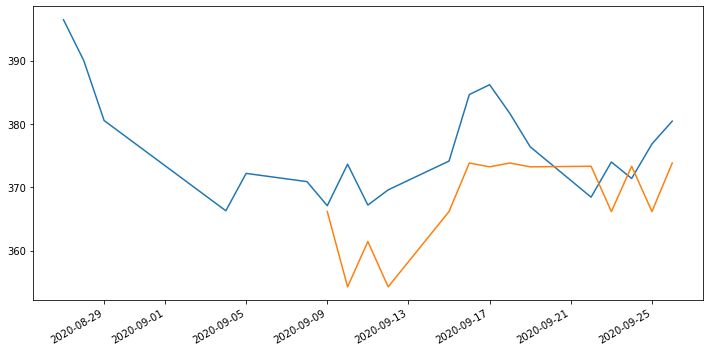

In [18]:
stocks_money['ROSN_OPEN'].iloc[-20:].plot(figsize=(12,6))
stocks_money['Predict'].plot(figsize=(12,6))

* 0 - 'EUR/RUB'
* 1 - 'USD/RUB'
* 2 - 'CLOSE BRENT, $'
* 3 - 'ROSN_OPEN_prev'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

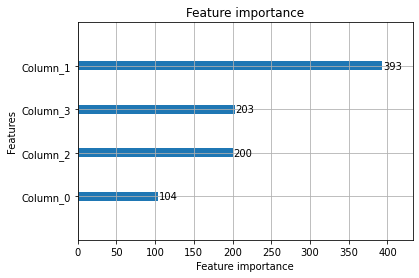

In [19]:
lgb.plot_importance(regr)

Отсюда можно сделать вывод, что наибольшее влияние оказывает стоимость доллара

In [50]:
columns_for_lags = ['EUR/RUB', 'USD/RUB', 'CLOSE BRENT, $', 'ROSN_OPEN_prev']
col30 = stocks_money[columns_for_lags].shift(periods=30, fill_value=-1)
col30.columns = ['EUR/RUB30', 'USD/RUB30', 'CLOSE BRENT, $30', 'ROSN_OPEN_prev30']
col180 = stocks_money[columns_for_lags].shift(periods=180, fill_value=-1)
col180.columns = ['EUR/RUB180', 'USD/RUB180', 'CLOSE BRENT, $180', 'ROSN_OPEN_prev180']
col360 = stocks_money[columns_for_lags].shift(periods=360, fill_value=-1)
col360.columns = ['EUR/RUB360', 'USD/RUB360', 'CLOSE BRENT, $360', 'ROSN_OPEN_prev360']
#pd.concat([stocks_money, col30, col180, col360], ignore_index=True)
stocks_money2 = pd.concat([stocks_money, col30, col180, col360], axis=1)

In [59]:
list(col30.columns)

['EUR/RUB30', 'USD/RUB30', 'CLOSE BRENT, $30', 'ROSN_OPEN_prev30']

In [67]:
list_for_x = ['EUR/RUB', 'USD/RUB', 'CLOSE BRENT, $', 'ROSN_OPEN_prev'] + list(col30.columns) + list(col180.columns) + list(col360.columns)
print(list_for_x)

['EUR/RUB', 'USD/RUB', 'CLOSE BRENT, $', 'ROSN_OPEN_prev', 'EUR/RUB30', 'USD/RUB30', 'CLOSE BRENT, $30', 'ROSN_OPEN_prev30', 'EUR/RUB180', 'USD/RUB180', 'CLOSE BRENT, $180', 'ROSN_OPEN_prev180', 'EUR/RUB360', 'USD/RUB360', 'CLOSE BRENT, $360', 'ROSN_OPEN_prev360']


In [68]:
X = stocks_money2[list_for_x].iloc[:-14].values
y = stocks_money2['ROSN_OPEN'].iloc[:-14].values
x_train, x_test = X, stocks_money2[list_for_x].iloc[-14:].values
y_train, y_test = y, stocks_money2['ROSN_OPEN'].iloc[-14:].values

In [69]:
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.1
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = ['r2_score']
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
regr2 = lgb.train(params, d_train, 100)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2308, number of used features: 16
[LightGBM] [Info] Start training from score 276.040277


In [70]:
y_pred2=regr2.predict(x_test)

In [71]:
mse(y_pred2, y_test, squared=False)

5.757057939556753

In [72]:
mae(y_pred2, y_test)

4.836627823707777

In [73]:
r2_score(y_pred2, y_test)

-1.0846286894883108

In [74]:
stocks_money['Predict2'] = np.nan
stocks_money['Predict2'].iloc[-14:] = y_pred2[:14]
stocks_money

EUR/RUB  USD/RUB  HIGH BRENT, $  LOW BRENT, $  OPEN BRENT, $  \
2008-01-11  35.9214  24.4796          92.97         90.73          92.26   
2008-01-15  36.1212  24.2913          92.94         90.50          92.25   
2008-01-16  36.1130  24.2858          90.98         88.30          90.74   
2008-01-17  36.0646  24.3367          90.69         88.39          88.93   
2008-01-18  35.8620  24.5043          89.97         88.22          88.50   
...             ...      ...            ...           ...            ...   
2020-09-22  90.0063  76.0381          42.20         41.21          41.78   
2020-09-23  89.4813  76.2711          42.62         41.21          41.73   
2020-09-24  89.2508  76.3545          42.02         41.27          41.45   
2020-09-25  89.9818  77.1780          42.33         41.52          41.80   
2020-09-26  89.6637  76.8195          42.38         41.79          41.80   

            CLOSE BRENT, $  ROSN_OPEN  ROSN_OPEN_prev     Predict    Predict2  
2008-01-11           91.06     225.99          228.77         NaN         NaN  
2008-01-15           90.76     224.85          225.99         NaN         NaN  
2008-01-16           88.91     220.30          224.85         NaN         NaN  
2008-01-17           88.48     214.19          220.30         NaN         NaN  
2008-01-18           88.86     207.11          214.19         NaN         NaN  
...                    ...        ...             ...         ...         ...  
2020-09-22           41.73     368.45          376.40  373.328846  377.364413  
2020-09-23           41.45     374.00          368.45  366.177790  371.402739  
2020-09-24           41.80     371.40          374.00  373.328846  376.669870  
2020-09-25           41.80     376.85          371.40  366.177790  372.294076  
2020-09-26           42.26     380.45          376.85  373.840527  377.579589  

[2322 rows x 10 columns]

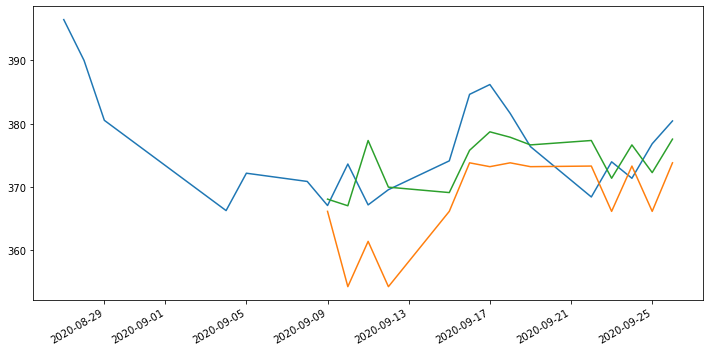

In [75]:
stocks_money['ROSN_OPEN'].iloc[-20:].plot(figsize=(12,6))
stocks_money['Predict'].plot(figsize=(12,6))
stocks_money['Predict2'].plot(figsize=(12,6))

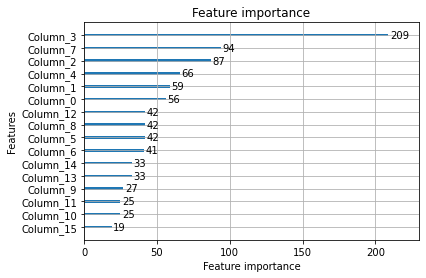

In [76]:
lgb.plot_importance(regr2)

Здесь похоже ROSN_OPEN_prev влияет больше всего